In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('Movie_Review.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [5]:
data['text'] = data['text'].apply(clean_review)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\rc/nltk_data'
    - 'C:\\anaconda\\nltk_data'
    - 'C:\\anaconda\\share\\nltk_data'
    - 'C:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\rc\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [7]:
#wordcloud 

from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [8]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [9]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [11]:
reviews = cv.fit_transform(data['text']).toarray()

In [12]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [13]:
data['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [18]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [19]:
predict = model.predict(reviews_test)

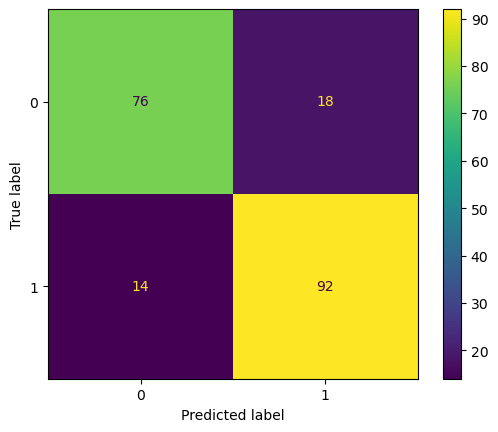

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [21]:
import pickle as pk

In [22]:
pk.dump(model,open('model.pkl','wb'))

In [23]:
pk.dump(cv,open('scaler.pkl','wb'))

In [24]:
pip install emojis



SyntaxError: invalid syntax (2195608844.py, line 1)

In [25]:
pip install emojis



SyntaxError: invalid syntax (2195608844.py, line 1)